# Facebook Ads Data Analysis and Visualization Project with Python

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [125]:
import numpy as np

In [5]:
fb = pd.read_csv('facebook_ads_data (2.0).csv')

In [6]:
fb.shape

(1494, 10)

In [7]:
fb.index

RangeIndex(start=0, stop=1494, step=1)

In [8]:
fb.dtypes

ad_date               object
campaign_name         object
total_spend          float64
total_impressions      int64
total_clicks           int64
total_value          float64
cpc                  float64
cpm                  float64
ctr                  float64
romi                 float64
dtype: object

In [9]:
fb.columns

Index(['ad_date', 'campaign_name', 'total_spend', 'total_impressions',
       'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi'],
      dtype='object')

# Soru 1

#### 1. Verileri günlere göre gruplandırın ve gruplanmış veriler için şu iki grafiği oluşturun:
* 2021 yılındaki günlük reklam harcamalarının toplamını gösteren bir grafik;
* 2021 yılındaki günlük ROMI'yi gösteren bir grafik.
* Bonus Görev: rolling() yöntemini kullanarak hareketli ortalama harcamaları ve ROMI'yi gösterin.

In [11]:
# Veri setimde 'ad_date' data type ı object olarak yer alıyordu. Öncelikle veri türünü datetime a çevirdim.

fb["ad_date"] = pd.to_datetime(fb["ad_date"])

In [12]:
# 2021 yılındaki verileri filtreledim.

fb_2021 = fb[fb["ad_date"].dt.year == 2021]

In [13]:
# Ad_date'i günlere göre gruplayıp toplam reklam harcaması ve ROMI'yi hesapladım.

daily_data = fb_2021.groupby('ad_date').agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index()

In [92]:
# Günlere göre gruplanmış ROMI'yi hesapladım.

daily_data["romi"] = (daily_data["total_value"] / daily_data["total_spend"]).round(2)

In [15]:
import matplotlib.dates as mdates

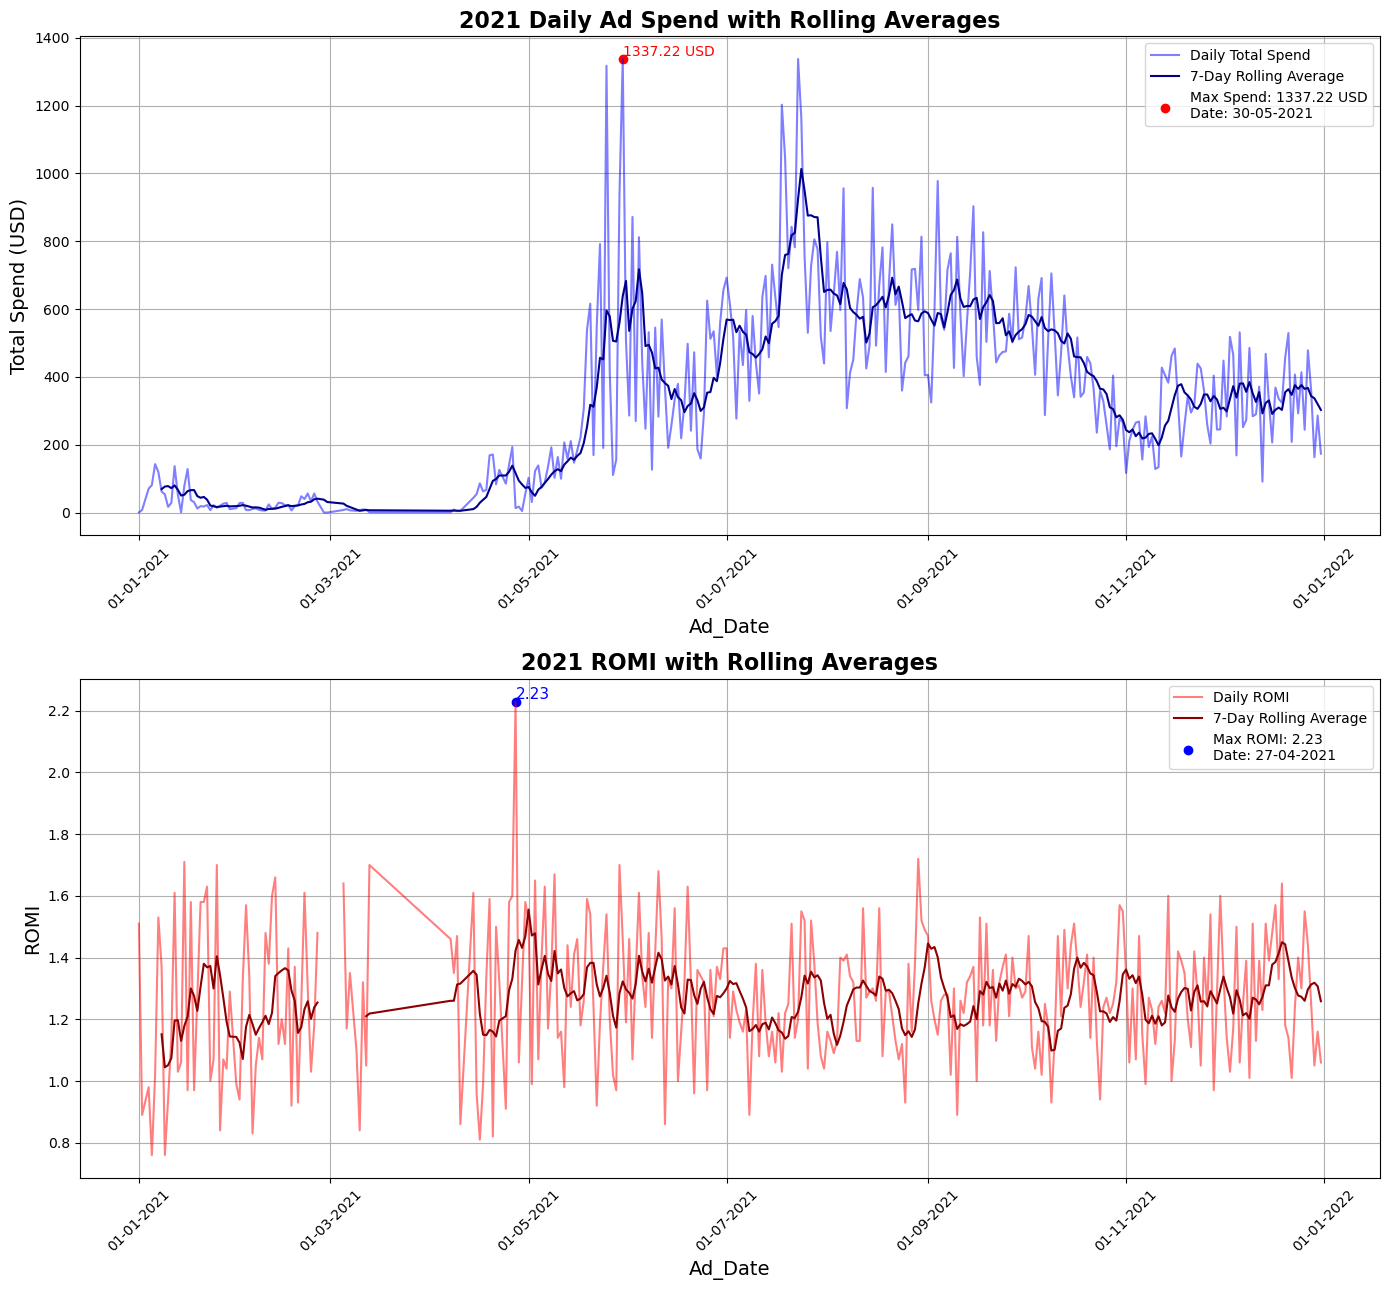

In [16]:
# Grafik ebatlarını oluşturdum.
plt.figure(figsize=(14, 13))

# Hareketli ortalama hesapladım. (7 günlük)
daily_data["spend_rolling"] = daily_data["total_spend"].rolling(window=7).mean()
daily_data["romi_rolling"] = daily_data["romi"].rolling(window=7).mean()

# Total_Spend hareketli ortalama grafiği:
plt.subplot(2, 1, 1)
plt.plot(daily_data["ad_date"], 
         daily_data["total_spend"], 
         label="Daily Total Spend", color="b", 
         alpha=0.5)
plt.plot(daily_data["ad_date"], 
         daily_data["spend_rolling"], 
         label="7-Day Rolling Average", color="darkblue")

# En yüksek değeri bulma ve işaretleme:
max_spend = daily_data["total_spend"].max()
max_spend_date = daily_data.loc[daily_data["total_spend"] == max_spend, "ad_date"].iloc[0]
plt.scatter(max_spend_date, max_spend, color="red", zorder=0)
plt.text(max_spend_date, max_spend, f"{max_spend} USD", 
         color="red", ha="left", va="bottom", fontsize=10)

# Grafik düzenleme:
plt.xlabel("Ad_Date", fontsize=14)
plt.ylabel("Total Spend (USD)",fontsize=14)
plt.title("2021 Daily Ad Spend with Rolling Averages",fontsize=16,weight='bold')
plt.legend([
    "Daily Total Spend", 
    "7-Day Rolling Average",
    f"Max Spend: {max_spend} USD\nDate: {max_spend_date.strftime('%d-%m-%Y')}"
])
plt.grid()

# Tarih formatını gün-ay-yıl olarak ayarlama
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().tick_params(axis='x', rotation=45)

# ROMI hareketli ortalama grafiği
plt.subplot(2, 1, 2)
plt.plot(daily_data["ad_date"], 
         daily_data["romi"], 
         label="Daily ROMI", color="r", 
         alpha=0.5)
plt.plot(daily_data["ad_date"], 
         daily_data["romi_rolling"], 
         label="7-Day Rolling Average", color="darkred")

# En yüksek ROMI değerini bulma ve işaretleme
max_romi = daily_data["romi"].max()
max_romi_date = daily_data.loc[daily_data["romi"] == max_romi, "ad_date"].iloc[0]
plt.scatter(max_romi_date, max_romi, color="blue", zorder=0)
plt.text(max_romi_date, max_romi, f"{max_romi}", 
         color="blue", ha="left", va="bottom", fontsize=11)

plt.xlabel("Ad_Date",fontsize=14)
plt.ylabel("ROMI",fontsize=14)
plt.title("2021 ROMI with Rolling Averages",fontsize=16, weight='bold')
plt.legend([
    "Daily ROMI", 
    "7-Day Rolling Average",
    f"Max ROMI: {max_romi}\nDate: {max_romi_date.strftime('%d-%m-%Y')}"
])
plt.grid()

# Tarih formatını gün-ay-yıl olarak ayarlama
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Grafik Yorumu
* Grafikleri incelediğimizde Mart ayının ortasından itibaren reklam harcaması yapılmadığı, buna bağlı olarak ROMI'nin yani pazarlama gelirlerinin sert bir şekilde düştüğünü görüyoruz. 
* Nisan ayında yapılan pazarlama harcamaları oldukça başarılı olmuş ki ROMI miktarı Nisan ayında en yüksek seviyeye ulaşmış.
* Ancak mayıs ayından sonra yapılan harcamalar gelirde büyük bir değişiklik yaratmamış.

# Soru 2 

#### Verileri kampanya adına göre gruplayarak iki grafik oluşturun:

* Her bir kampanyadaki toplam reklam harcamalarının grafiği;
* Her bir kampanyadaki genel ROMI grafiği.

In [94]:
# Verileri kampanya adına göre grupladım.

campaign_grouped = fb.groupby('campaign_name').agg({
    'total_spend': 'sum',  
    'total_value': 'sum'   
}).reset_index().round(2)

In [96]:
#Romi'yi kampanya adına göre gruplanmış şekilde hesapladım.

campaign_grouped['romi'] = (campaign_grouped['total_value'] / campaign_grouped['total_spend']).round(2)

In [98]:
# Total_spend'e göre sıralanan yeni bir değişken atadım.

campaign_grouped_sorted = campaign_grouped.sort_values(by='total_spend', ascending=True)

In [100]:
# Romi'ye göre sıralanan yeni bir değişken atadım.

campaign_grouped_sorted2 = campaign_grouped.sort_values(by='romi', ascending=True)

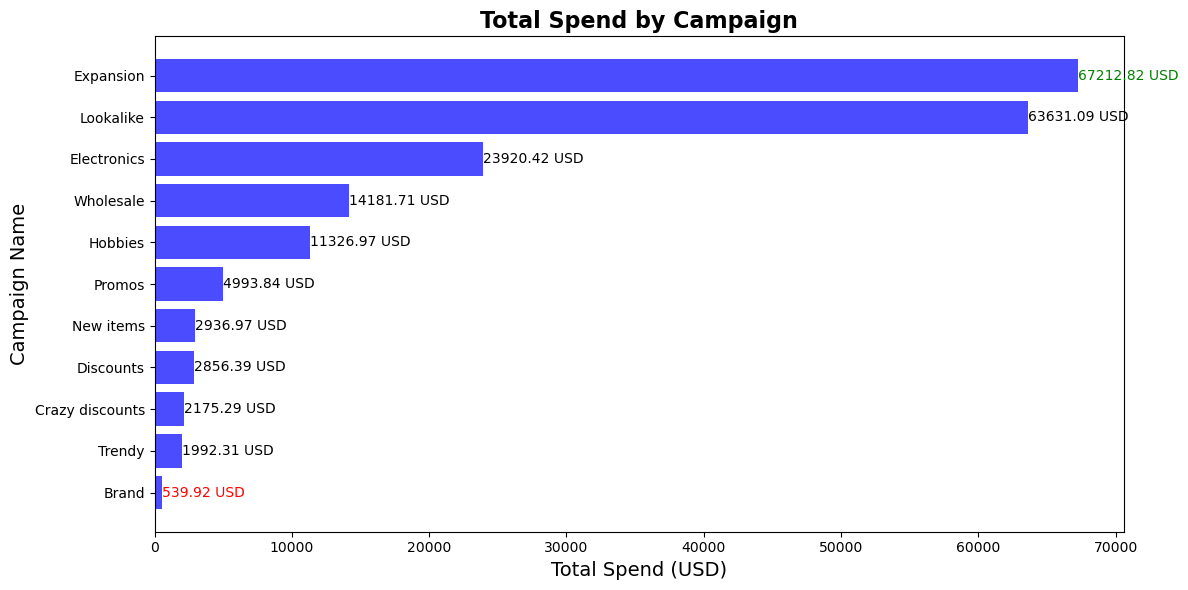

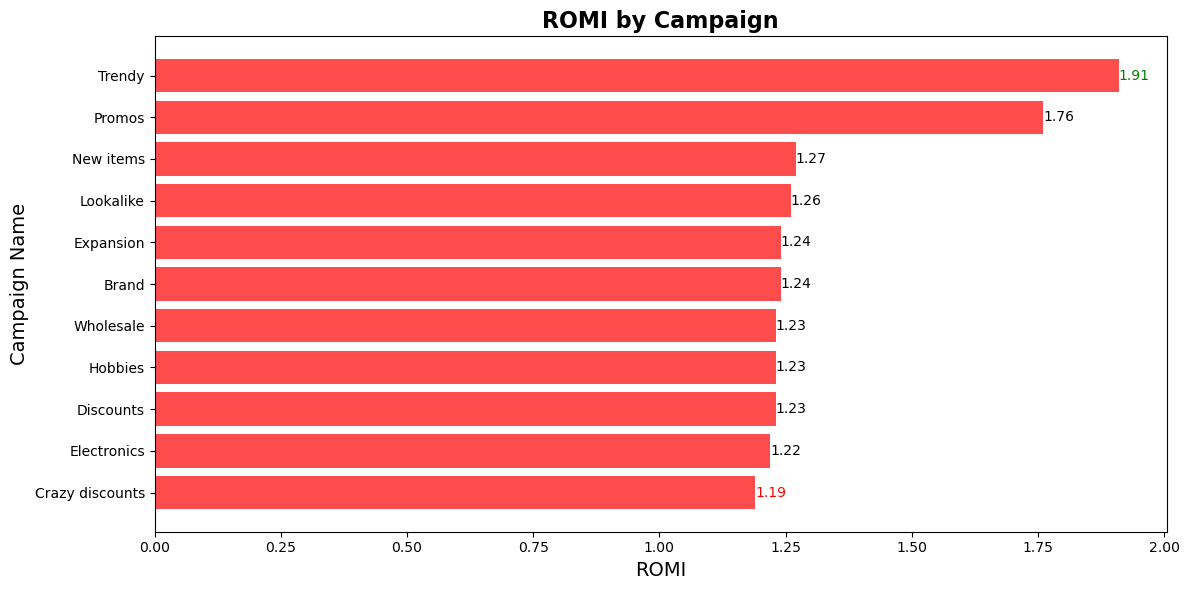

In [102]:
# Toplam harcama grafiği
plt.figure(figsize=(12, 6))

bars_spend = plt.barh(campaign_grouped_sorted['campaign_name'], 
                      campaign_grouped_sorted['total_spend'], 
                      color='blue', alpha=0.7)
plt.xlabel('Total Spend (USD)',fontsize=14)
plt.ylabel('Campaign Name',fontsize=14)
plt.title('Total Spend by Campaign',fontsize=16,weight='bold')

# Çizgileri kaldırdım.
plt.grid(False)

# En yüksek ve en düşük barları tespit ettim.
max_spend = campaign_grouped_sorted['total_spend'].max()
min_spend = campaign_grouped_sorted['total_spend'].min()

# Tüm barlar üzerine değerleri yazdırdım.
for bar in bars_spend:
    x = bar.get_width()  # Yatay barda genişlik kullan.
    if x == max_spend:
        color = 'green'  # En yüksek değeri yeşil renkte yaz
    elif x == min_spend:
        color = 'red'  # En düşük değeri kırmızı renkte yaz
    else:
        color = 'black'  # Diğerlerini siyah renkte yaz
    
    text = f"{round(x, 2)} USD"  # Her değerin yanına "USD" ekle.
    
    plt.text(x, bar.get_y() + bar.get_height() / 2, text, ha='left', va='center', fontsize=10, color=color)

plt.tight_layout()

# Ortalama ROMI grafiği 
plt.figure(figsize=(12, 6))
bars_romi = plt.barh(campaign_grouped_sorted2['campaign_name'], 
                     campaign_grouped_sorted2['romi'], 
                     color='red', alpha=0.7)
plt.xlabel('ROMI',fontsize=14)
plt.ylabel('Campaign Name',fontsize=14)
plt.title('ROMI by Campaign',fontsize=16, weight='bold')

# Çizgileri kaldır
plt.grid(False)

# En yüksek ve en düşük ROMI'yi tespit et
max_romi = campaign_grouped_sorted2['romi'].max()
min_romi = campaign_grouped_sorted2['romi'].min()

# Tüm barlar üzerine değerleri yaz
for bar in bars_romi:
    xval = bar.get_width()  # Yatay barda genişlik kullan.
    
    if xval == max_romi:
        color = 'green'  # En yüksek ROMI'yi yeşil renkte yaz
    elif xval == min_romi:
        color = 'red'  # En düşük ROMI'yi kırmızı renkte yaz
    else:
        color = 'black'  # Diğerlerini siyah renkte yaz

    plt.text(xval, bar.get_y() + bar.get_height() / 2, round(xval, 2), ha='left', va='center', fontsize=10, color=color)

plt.tight_layout()

plt.show()

#### Grafik Yorumu

*  En yüksek harcama 'Expansion' kampanyasında yapılmasına rağmen yatırım karşısında getirisi çok yüksek olmamış.
*  Buna karşılık 'Lookalike' kampanyası yapılan yatırımın karşılığını alarak getirisi yüksek olmuş.
*  'Promos' kampanyası ise  diğer kampanyalara göre daha az yatırım yapıldığı halde getiri yüksek olmuş.Bu kampanyaya benzer kampanyalar tekrar değerlendirilebilir.

# Soru 3

#### Her kampanyada günlük ROMI'nin dağılımının nasıl olduğunu box plot kullanarak belirleyin.

In [115]:
daily_fb = fb.groupby(['campaign_name', 'ad_date']).agg({
    'total_spend': 'sum',
    'total_value': 'sum'
}).reset_index().round()

In [127]:
daily_fb['romi'] = np.where(daily_fb['total_spend'] == 0, np.nan, (
    daily_fb['total_value'] / daily_fb['total_spend']).round(2))

In [134]:
daily_fb.groupby('campaign_name')['romi'].describe()

,count,mean,std,min,25%,50%,75%,max
campaign_name,,,,,,,,
Brand,94.0,1.241915,0.370229,0.50,1.0000,1.195,1.5000,2.00
Crazy discounts,124.0,1.207258,0.295493,0.70,0.9200,1.210,1.4525,1.78
Discounts,97.0,1.248351,0.297744,0.76,1.0000,1.210,1.5300,1.86
Electronics,170.0,1.226765,0.285758,0.76,0.9825,1.180,1.4675,1.80
Expansion,114.0,1.238158,0.242058,0.77,1.0500,1.215,1.4300,1.75
Hobbies,98.0,1.239184,0.215529,0.83,1.0925,1.205,1.3800,1.74
Lookalike,232.0,1.244655,0.240209,0.78,1.0600,1.260,1.4300,1.72
New items,97.0,1.267938,0.269505,0.75,1.0600,1.290,1.4800,1.71
Promos,142.0,1.753521,0.391613,1.00,1.4525,1.780,2.0675,2.44


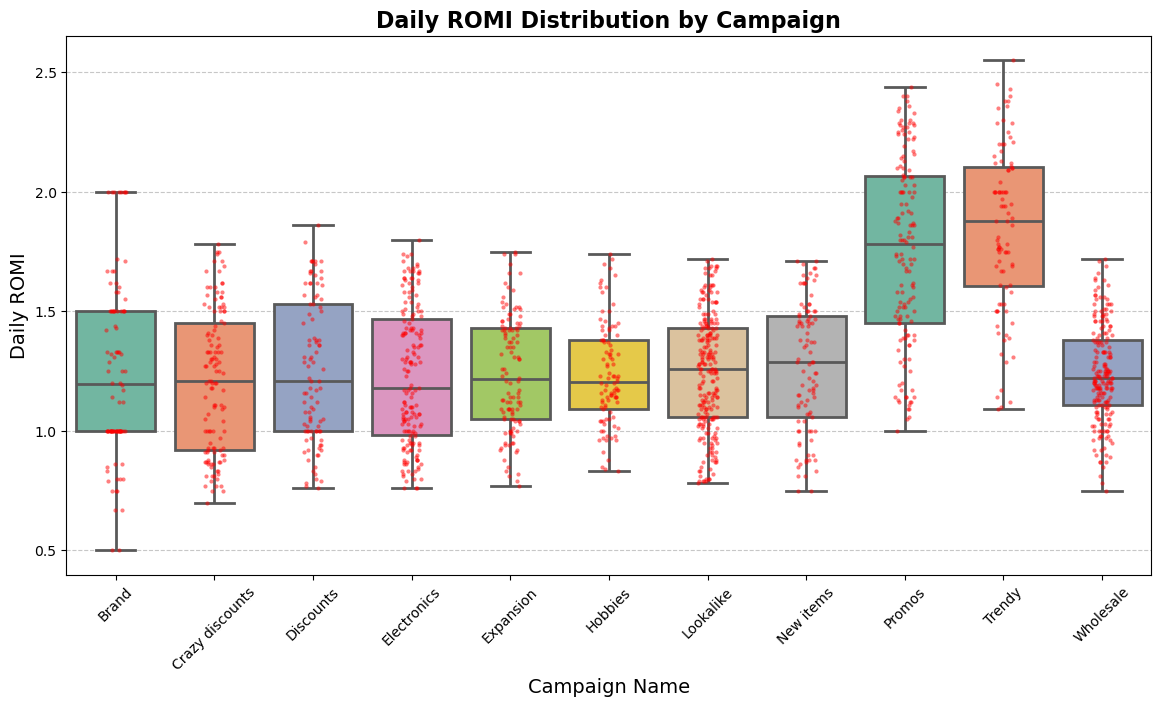

In [131]:
# Box Plot oluşturdum.

plt.figure(figsize=(14, 7))
ax = sns.boxplot(x='campaign_name', y='romi', data=daily_fb, 
                 hue='campaign_name', 
                 palette='Set2', 
                 linewidth=2, 
                 whis=1.5)

#Nokta grafiği ekledim.
sns.stripplot(x='campaign_name', y='romi', data=daily_fb, 
              color='red', 
              size=3, 
              jitter=True, 
              alpha=0.5, 
              ax=ax)

ax.set_xlabel('Campaign Name', fontsize=14)
ax.set_ylabel('Daily ROMI', fontsize=14)
ax.set_title('Daily ROMI Distribution by Campaign', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Grafik Yorumu

* Trendy ve Promos kampanyaları, en yüksek medyan değerlere ve ROMI’ye sahip. Bu kampanyaların yüksek performansı olduğunu gösteriyor. Ancak uç değerler oldukça belirgin. Yani bu kampanyalar genellikle iyi performans sağlasa da, bazı istisnai durumlar olabilir.
* Wholesale gibi kampanyalar daha düşük ancak daha istikrarlı ROMI’ye sahip.
Hedefin ne?
* Eğer risk alıp yüksek ROMI elde etmek isteniyorsa, Trendy veya Promos gibi kampanyalar daha uygun olabilir.
* Eğer daha az dalgalanma ve stabil getiri isteniyorsa, Wholesale veya Hobbies tutarlı, dar dağılımlara sahip ve uç değerler daha az belirgin olan kampanyalar daha güvenli seçenekler olabilir. Özellikle Wholsele'in dağılımın mediana yakın olması, bu tür tutarlı kampanyaların örnek alınması gerektiğini gösteriyor olabilir.

# Soru 4

#### Facebook_ads_data.csv tablosundaki ROMI değerlerinin dağılımını gösteren bir histogram oluşturun.

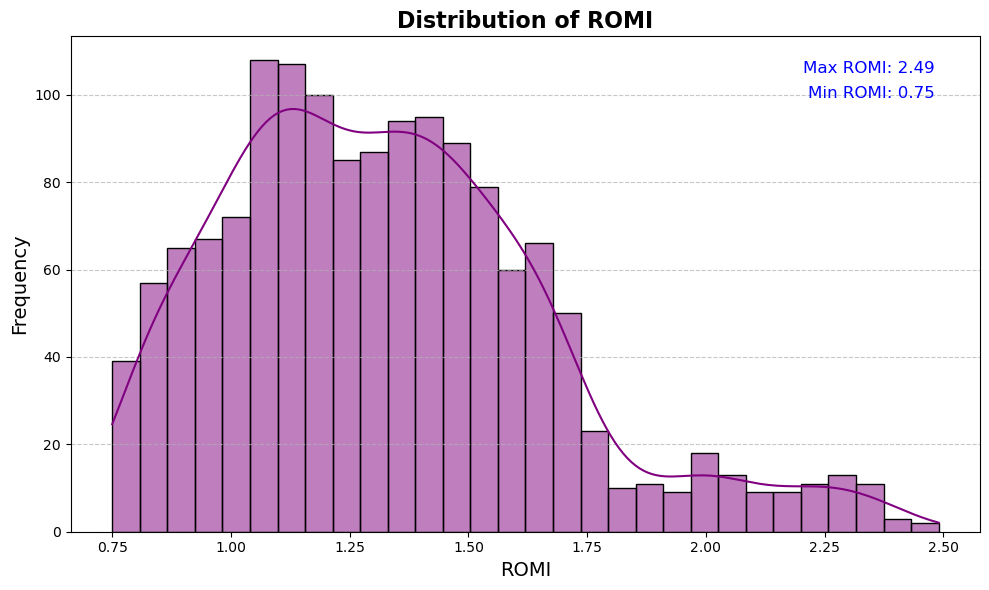

In [136]:
plt.figure(figsize=(10, 6))

# Histogram oluşturdum.

sns.histplot(fb['romi'], kde=True, color='purple', bins=30)

# En yüksek ve en düşük ROMI değerlerini hesapladım.
max_romi = fb['romi'].max()
min_romi = fb['romi'].min()

plt.title('Distribution of ROMI', fontsize=16, weight='bold')
plt.xlabel('ROMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Max ve min Romi bilgisini veren bir label oluşturdum.

plt.text(0.95, 0.95, f"Max ROMI: {max_romi:.2f}", 
         ha='right', va='top', fontsize=12, color='blue', transform=plt.gca().transAxes)
plt.text(0.95, 0.90, f"Min ROMI: {min_romi:.2f}", 
         ha='right', va='top', fontsize=12, color='blue', transform=plt.gca().transAxes)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Grafik Yorumu
* Veri setinindeki değerlerin çoğu 0.75 ile 1.75 arasında olan düşük değerlerde yoğunlaşmıştır.
* Histogramın, sağ eğimli olduğunu görüyoruz Çoğu kampanyanın düşük ROMI değerleri var.
* Bu da genel olarak yatırım getirisi düşük kampanyaların olduğunu gösteriyor.

# Soru 5

#### Facebook_ads_data.csv tablosundaki tüm sayısal göstergeler arasındaki korelasyonun ısı haritasını çıkarın. 
* Hangi göstergeler en yüksek ve en düşük korelasyona sahip?
* "total_value" ile hangi faktörler arasında korelasyon var?

In [32]:
# Sayısal verileri filtreledim.

numerical_columns = fb.select_dtypes(include=['float64', 'int64'])

In [33]:
# Korelasyon matrisini hesapladım.

correlation_matrix = numerical_columns.corr()
correlation_matrix 

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
total_spend,1.000000,0.475607,0.480066,0.978890,0.262254,0.482027,-0.025495,-0.114638
total_impressions,0.475607,1.000000,0.765489,0.472037,-0.093097,-0.121094,-0.155701,-0.099712
total_clicks,0.480066,0.765489,1.000000,0.472124,-0.159521,-0.032829,0.200440,-0.101875
total_value,0.978890,0.472037,0.472124,1.000000,0.250851,0.471338,-0.022267,-0.013519
cpc,0.262254,-0.093097,-0.159521,0.250851,1.000000,0.593732,-0.210719,-0.076675
cpm,0.482027,-0.121094,-0.032829,0.471338,0.593732,1.000000,0.116213,-0.062429
ctr,-0.025495,-0.155701,0.200440,-0.022267,-0.210719,0.116213,1.000000,-0.049743
romi,-0.114638,-0.099712,-0.101875,-0.013519,-0.076675,-0.062429,-0.049743,1.000000


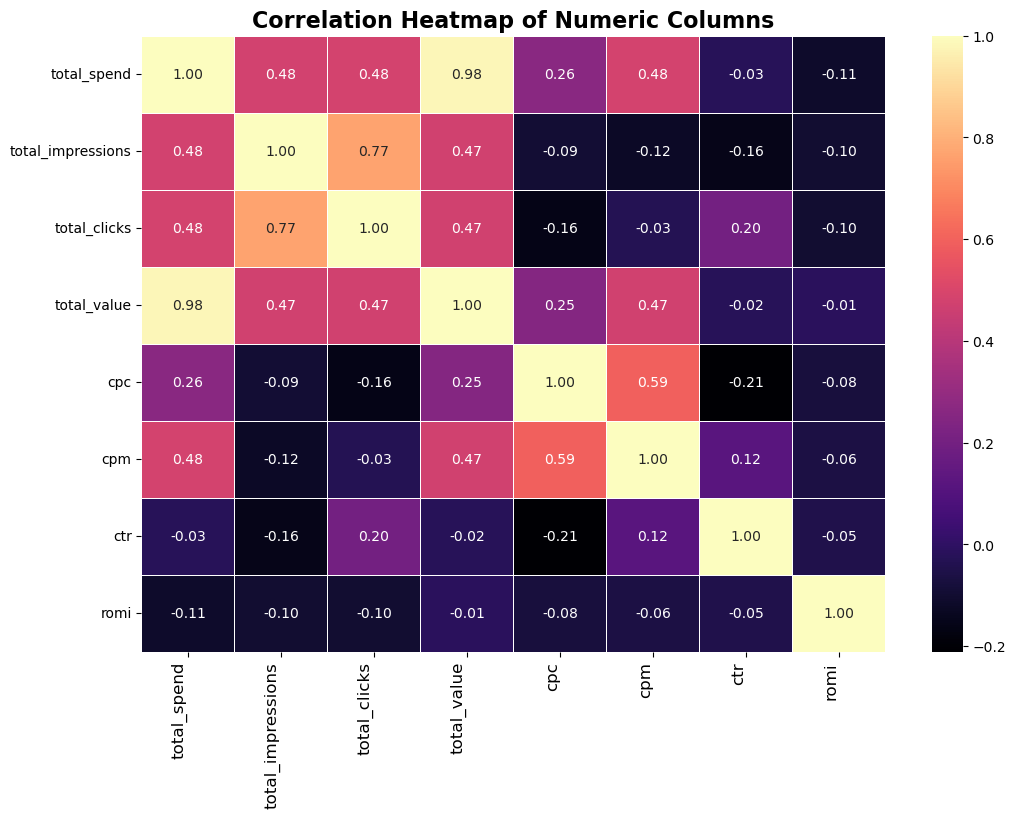

In [34]:
# Isı haritası oluşturdum.

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='magma', 
            fmt='.2f', 
            linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns', 
          fontsize=16, 
          weight='bold')
plt.xticks(rotation=90, 
           ha='right', 
           fontsize=12)
plt.show()

In [35]:
# Korelasyon değerlerini sıraladım.

corr_values = correlation_matrix.unstack().sort_values(ascending=False)

In [36]:
# Metriği kendi korelasyonunu ile hariç tuttum.
corr_values = corr_values[corr_values != 1]

# En yüksek korelasyonlar:
print("En yüksek korelasyonlar:")
print(corr_values.head(1))

# En düşük korelasyonlar:
print("\nEn düşük korelasyonlar:")
print(corr_values.tail(1))

En yüksek korelasyonlar:
total_value  total_spend    0.97889
dtype: float64

En düşük korelasyonlar:
cpc  ctr   -0.210719
dtype: float64


In [37]:
# 'total_value' ile hangi faktörler arasında korelasyonu olduğunu buldum.

total_value_correlation = correlation_matrix['total_value'].sort_values(ascending=False)

# 'total_value' ile korelasyonu olan metrikler:
print("Total Value ile Korelasyon:")
print(total_value_correlation)

Total Value ile Korelasyon:
total_value          1.000000
total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013519
ctr                 -0.022267
Name: total_value, dtype: float64


#### Grafik Yorum
*  Total_spend ile total_value arasında çok güçlü bir pozitif ilişki var(0.97).Daha fazla harcama yapıldıkça, toplam değerin de arttığını görüyoruz.Doğru bir reklam stratejisinin potansiyel getiri ile doğrudan ilişkili olduğunu gösteriyor.
* Ttotal_clicks ile total_impressions  arasındaki pozitif korelasyon da yüksek sayılabilir. Bu, gösterim sayısının artmasıyla tıklama sayısının arttığını göstermektedir.
* Total_value ile total_impressions arasındaki pozitif korelasyon orta seviyede (yaklaşık 0.47). Gösterimlerin artması, genellikle tıklamaların ve dolayısıyla gelirlerin artması ile ilişkilidir. Ancak, bu ilişki güçlü bir şekilde doğrusal değil ve her gösterim aynı düzeyde gelir yaratmayabilir anlamını taşıyor.
* CTR ile total_value arasındaki korelasyon çok zayıf ve negatiftir (-0.02). Bu, tıklama oranının artmasının toplam geliri çok fazla etkilemediğini gösteriyor. Bu da, tıklama oranının toplam gelir üzerinde anlamlı bir etkisi olmadığını düşündürüyor.

# Soru 6

#### Değişkenler arasındaki ilişkiyi görselleştirmek için "total_spend" ve "total_value" verileri üzerinden oluşturulan doğrusal regresyonlu bir nokta grafiği oluşturun (bunun için lmplot() fonksiyonunu kullanabilirsiniz).

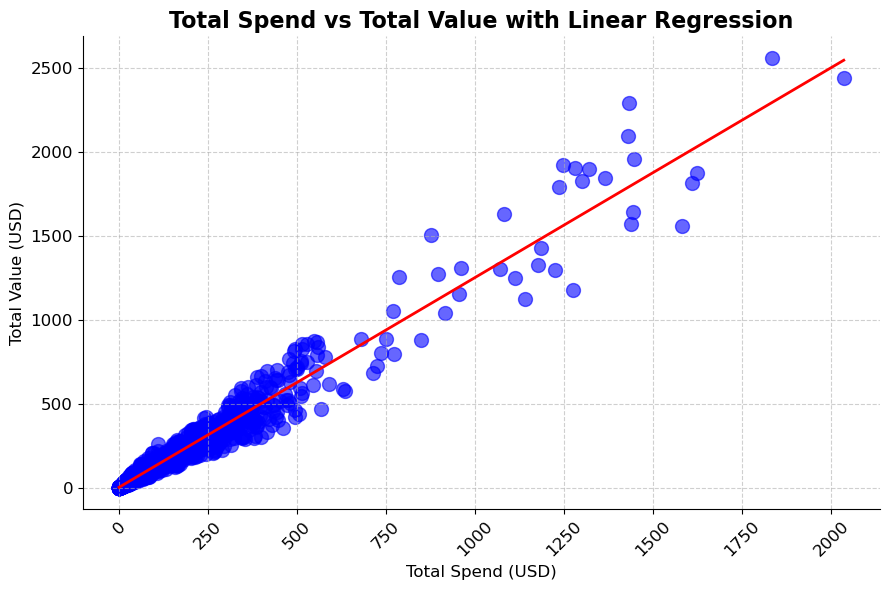

In [40]:
# lmplot ile doğrusal regresyonlu nokta grafiği oluşturdum.

sns.lmplot(x='total_spend', y='total_value', data=fb, 
           aspect=1.5, height=6, 
           scatter_kws={'s': 100, 
                        'color': 'blue', 
                        'alpha': 0.6},
           line_kws={'color': 'red', 'linewidth': 2}, 
           ci=None)  

plt.title('Total Spend vs Total Value with Linear Regression', fontsize=16, weight='bold')
plt.xlabel('Total Spend (USD)', fontsize=12)
plt.ylabel('Total Value (USD)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

#### Grafik Yorum

* Noktaların 0 ile 1000 (Total Value) ve 0 ile 500 (Total Spend) arasında yoğunlaşması, çoğu kampanya veya reklamın, daha düşük bütçelerle ve daha düşük sonuçlarla gerçekleştiğini gösteriyor.
* Total_spend arttıkça noktaların azalması, yüksek miktarlı kampanyaların sayısının daha az olduğunu gösteriyor. Ancak yüksek harcaması olan kampanyaların da getirisinin de yüksek olduğu durumlar mevcut.Ayrıca noktalar yüksek harcama ve yüksek değere sahip kampanyalarda daha dağınık durumdadır.Bu tür yüksek bütçeli kampanyaların birbirinden farklı sonuçlar verdiğini gösterir. 
